**Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

import warnings
warnings.filterwarnings('ignore')

#!pip install pandas_profiling
#import pandas_profiling

In [2]:
df = pd.read_csv(r'C:\Users\Seeni\PG-AIML\Supervised Learning\Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bLoan_df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
bLoan_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bLoan_df1 = pd.get_dummies(bLoan_df, columns=['Education'])
bLoan_df1.head
bLoan_df1.to_csv(r'C:\Users\Seeni\PG-AIML\Supervised Learning\PLoan', index = False)

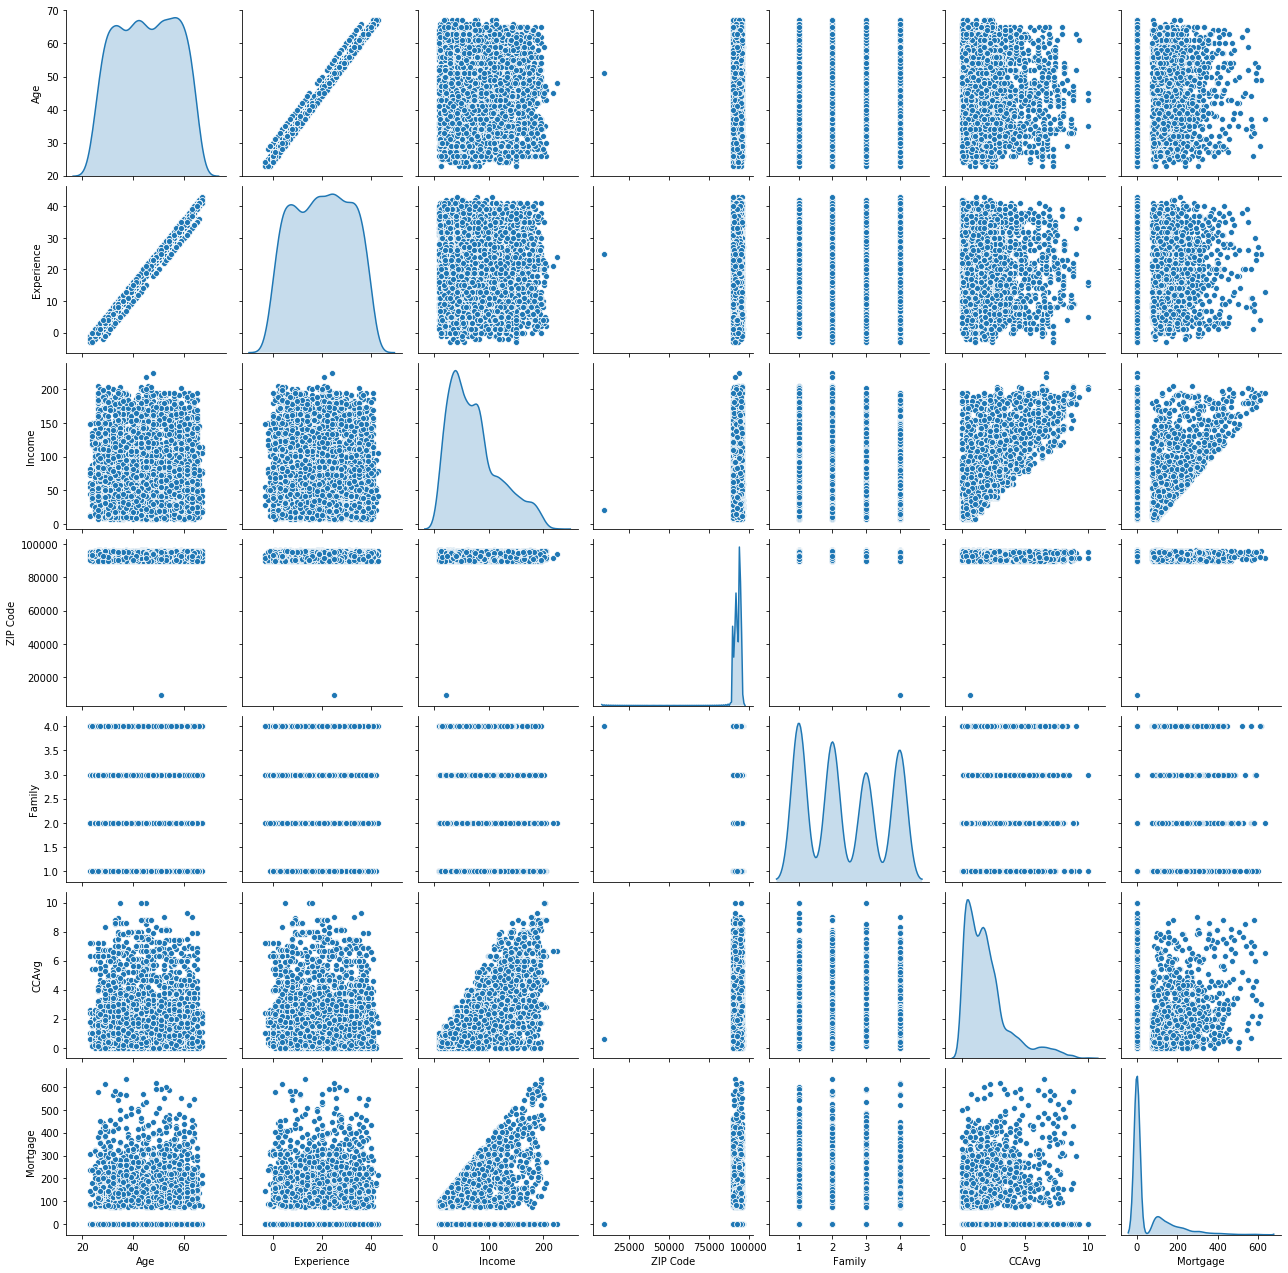

In [5]:
cData_attr = bLoan_df1.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [6]:
bLoan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [7]:
bLoan_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
#  Study the data distribution in each attribute and target variable, share your findings
#  Number of unique in each column? Univariate and Bivariate
bLoan_df.describe().transpose()
uniqueValues = bLoan_df.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


In [9]:
bLoan_df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [10]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

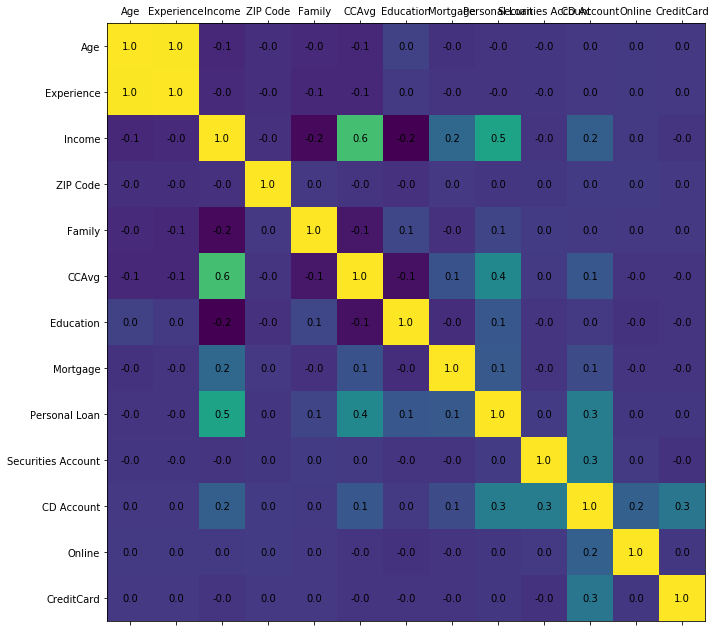

In [11]:
plot_corr(bLoan_df)

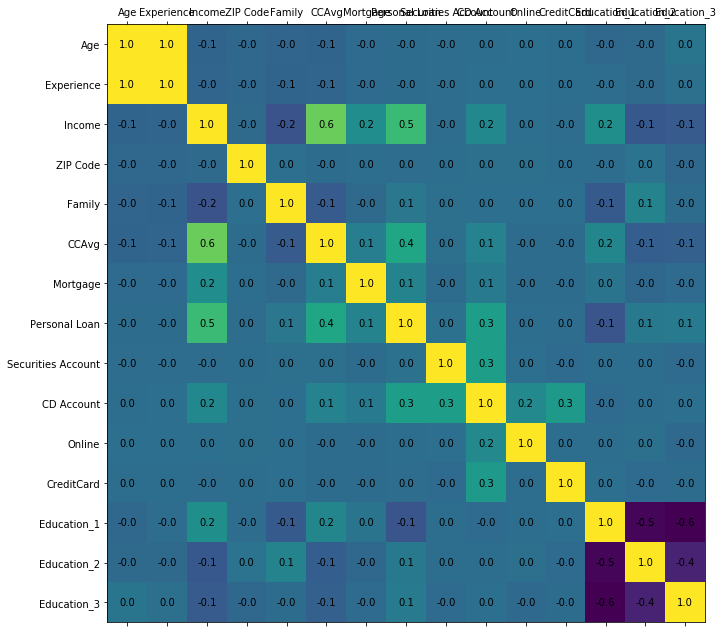

In [12]:
plot_corr(bLoan_df1)

In [13]:
# Number of people with zero mortgage?

zm_df = bLoan_df[bLoan_df['Mortgage']==0]
zm_Count= zm_df.count()
index=zm_df.index
no_of_rows=len(index)
print('Number of people with zero mortgage: ', no_of_rows)

Number of people with zero mortgage:  3462


In [14]:
# Number of people with zero credit card spending per month?
zCC_df = bLoan_df[bLoan_df['CCAvg']==0]
zCC_Count= zCC_df.count()
index_CC=zCC_df.index
no_of_rows=len(index_CC)
print('Number of people with zero credit card spending per month: ', no_of_rows)

Number of people with zero credit card spending per month:  106


In [15]:
# Value counts of all categorical columns

bLoan_df1['Personal Loan'] = bLoan_df1['Personal Loan'].astype('category')
bLoan_df1['Securities Account'] = bLoan_df1['Securities Account'].astype('category')
bLoan_df1['CD Account'] = bLoan_df1['CD Account'].astype('category')
bLoan_df1['Online'] = bLoan_df1['Online'].astype('category')
bLoan_df1['CreditCard'] = bLoan_df1['CreditCard'].astype('category')
bLoan_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  Education_1         5000 non-null   uint8   
 13  Education_2         5000 non-null   uint8   
 14  Education_3         5000 non-null   uint8   
dtypes: category(5), float64(1), int64(6), 

In [16]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = bLoan_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [17]:
## Define X and Y variables
X = bLoan_df.drop('Personal Loan', axis=1)
Y = bLoan_df[['Personal Loan']]

In [18]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [19]:
bLoan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [20]:
bLoan_df.groupby("Personal Loan").mean()
#People with higher Income(>66K) or Higher CCAvg(>1.7K) Spending tend to apply Personell Loan

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [21]:
#Lets analysze the distribution of the various attribute
bLoan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [22]:
#Convert X & Y variable to a categorical variable as relevant
bLoan_df['Personal Loan'] = bLoan_df['Personal Loan'].astype('category')
bLoan_df['Income'] = bLoan_df['Income'].astype('category')

In [23]:
bLoan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   category
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   int64   
 10  CD Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(2), float64(1), int64(10)
memory usage: 450.8 KB


In [24]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = bLoan_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


**There is a imbalance in the data**

### Model building using statsmodels.api

In [25]:
## Define X and Y variables
X = bLoan_df.drop('Personal Loan', axis=1)
Y = bLoan_df[['Personal Loan']]

In [26]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [27]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [28]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

         Current function value: 0.083673
         Iterations: 35


In [29]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3327
Method:                           MLE   Df Model:                          172
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.7327
Time:                        23:03:47   Log-Likelihood:                -292.85
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.201e-231
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -30.8408   7337.563     -0.004      0.997   -1.44e+04    1.44e+04
Age                    0.0371      0.107      0.346      0.729      -0.173       0.247
Experience          

### Interpretation of Pseudo R^2

A pseudo R^2 of 17% indicates that 17% of the uncertainty of the intercept only model is explained by the full model

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [30]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [31]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,4.29,72.82,0.99,0.00
Education,2.14,8.46,0.89,0.00
Family,1.04,2.84,0.74,0.00
CCAvg,0.19,1.21,0.55,0.00
Online,-0.57,0.56,0.36,0.02
Securities Account,-1.19,0.31,0.23,0.01
CreditCard,-1.42,0.24,0.20,0.00


* Customers with CD Account 1 have a 98% probability of converting to personal loan customers


### Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [32]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_predict = logreg.predict(X_test)

In [34]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9054285714285715

Testing accuracy 0.9006666666666666

Confusion Matrix


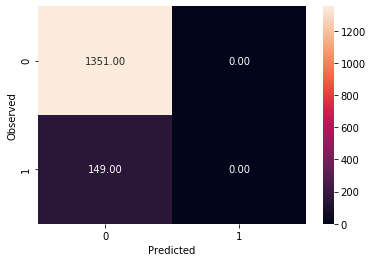

None

Recall: 0.0

Precision: 0.0

F1 Score: 0.0

Roc Auc Score: 0.5


In [35]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

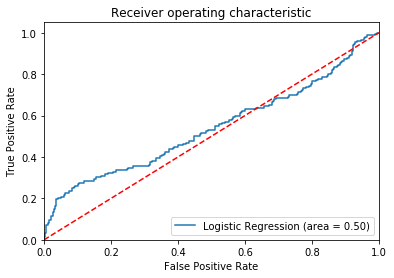

In [36]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Checking Parameters of Logistic Regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [37]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.948, 0.905, 0.905, 0.905, 0.905]

[0.926, 0.901, 0.901, 0.901, 0.901]


In [39]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.947, 0.905]

[0.921, 0.901]


In [40]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'
# choose any one

In [41]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9191428571428572

Testing accuracy 0.8846666666666667


In [42]:
## Testing accuracy increased and model is not overfit anymore so adding class weight from the model, 

In [43]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.846, 0.85, 0.887, 0.911, 0.917, 0.919]

[0.826, 0.835, 0.851, 0.87, 0.881, 0.885]


In [44]:
## Best testing accuracy is obtained for C=0.5, which is default

Trainig accuracy 0.9105714285714286

Testing accuracy 0.87

Confusion Matrix


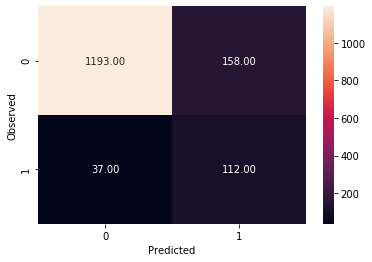

None

Recall: 0.7516778523489933

Precision: 0.4148148148148148

F1 Score: 0.5346062052505968

Roc Auc Score: 0.817363722621573


In [45]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [46]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


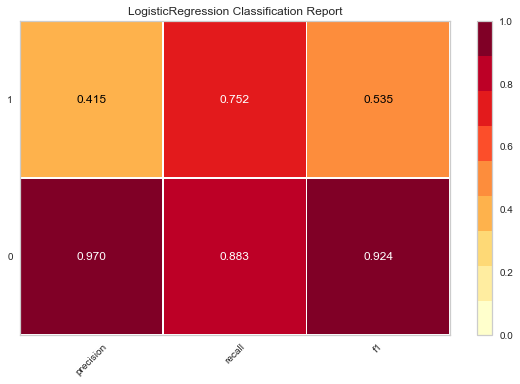

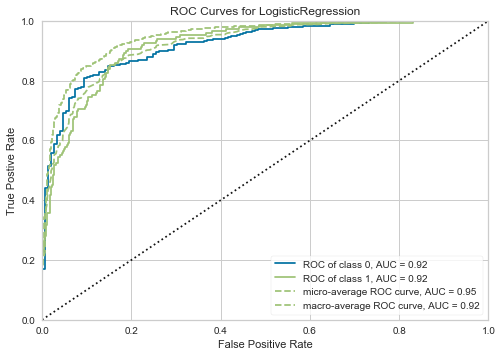

In [47]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Business Insights

**Confusion matrix means**

*True Positive (observed=1,predicted=1): = Predicted that existing Personal loan customer also will take Personal Loan.

*False Positive (observed=0,predicted=1): = Predicted that Personal Personal loan customer possibly will not take Personal Loan.

*True Negative (observed=0,predicted=0): Predicted that Personal loan customer will not take and the customer who took Personal loan

If the Bank wants to have more customers to take a Personal loan i.e. more number of True Negatives, if FP is high bank would lose business. So that the bank doesn't lose business on the people who have not applied for the loan. Hence Precision is the important metric.
